<a href="https://colab.research.google.com/github/galexbh/categorical-data-transformations/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform the following activities:
- Edit the null variables:
 - In case the column has more than 90% null values exclude.
 - In case it is a numeric variable, identify a good strategy to replace the null values with the median value.
In case it is a numerical variable, identify a good strategy to replace the null values by the median value.
 - In case they are categorical variables, replace by the value "others".
- Clean up the numeric variables:
 - Identify and explain a good stratification of how continuous numerical values should be analyzed.
analyzed the continuous numerical values.
 - In case there are outliers in these stratifications for the continuous numerical values, replace them with the mean.
- Clean categorical variables
 - According to the continuous values cleaning treatment techniques, clean and transform the categorical variables.
 - Leave in CSVs the translations or rules you generate from the categorical variables.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_bank_churners = pd.read_csv("/content/drive/MyDrive/UNAH/IA/exam_III/BankChurners.csv")

In [42]:
df_bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [43]:
size_bank_churners = df_bank_churners.shape[0]
size_bank_churners

10127

In [44]:
# returns the number of missing values in the data set
df_bank_churners.isnull().sum().to_frame('nulls')

,nulls
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [45]:
columns_valid = []
threshold = .90

# In case the column has more than 90% null values exclude.
for c_ in df_bank_churners.columns:
    level = np.sum((pd.isna( df_bank_churners.loc[ : , c_ ] )) / size_bank_churners)
    if level >= threshold:
        data = data.drop(columns=c_)

    columns_valid.append(c_)

columns_valid    

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [50]:
# If they are categorical variables, replace with the value "others"
var_categorical = df_bank_churners.loc[ : ,columns_valid ].select_dtypes('object').astype('category')
var_categorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [60]:
copy_bank_ch = df_bank_churners.copy()

level = copy_bank_ch.groupby(["Education_Level"], as_index = False)\
.agg({"Customer_Age":["count"]})

level.columns = level.columns.droplevel(1)

level["Percent"] = (level["Customer_Age"] / size_bank_churners)

level.sort_values(["Percent"], ascending = False)

level["Education_t"] = "Others"

level["Education_t"] = level\
.apply(lambda r: r["Education_Level"] if r["Percent"] > 0.1 else r["Education_t"], axis=1)

level.loc[:,["Education_Level", "Education_t"]]

copy_bank_ch = copy_bank_ch.merge(level, on= ["Education_Level"], how = "inner")

copy_bank_ch.tail(5).loc[: ,["Education_t"]]


,Education_t
10122,Others
10123,Others
10124,Others
10125,Others
10126,Others


In [55]:
level.to_csv("categorical-variables.csv")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbd52297d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbd521a2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbd522cd590>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbd5226a2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbd522bf650>],
 'means': []}

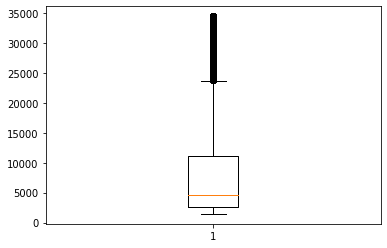

In [56]:
# We take is to have the most outliers
plt.boxplot(copy_bank_ch["Credit_Limit"])

In [57]:
copy_bank_ch.loc[:,"Credit_Limit"].value_counts()  / size_bank_churners

34516.0    0.050163
1438.3     0.050064
9959.0     0.001777
15987.0    0.001777
23981.0    0.001185
             ...   
27374.0    0.000099
10859.0    0.000099
19402.0    0.000099
15069.0    0.000099
4552.0     0.000099
Name: Credit_Limit, Length: 6205, dtype: float64

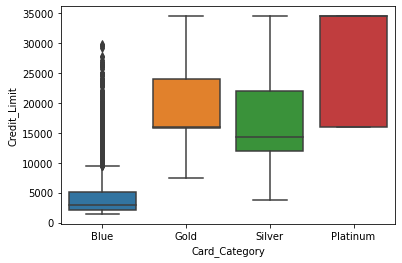

In [63]:
sns.boxplot(data = copy_bank_ch.loc[ (copy_bank_ch['Gender'] == 'F'), : ], x= 'Card_Category', y ='Credit_Limit' )